[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BilalR4M/dl_lab1/blob/main/dl_lab1_task2.ipynb)

# Task 2
Download the "Au_nanoParticle_dataset.csv" file, load it into a pandas DataFrame, and perform the following analysis:
1. Create a new DataFrame containing only the 'N_total', 'N_bulk', 'N_surface', and 'R_avg' columns.
2. Display the first 20 rows of this new DataFrame.
3. Calculate and display the mean, standard deviation, and quartile values for each of the four selected features.
4. Plot histograms for each of these features in a 1x4 layout.
5. Visualize the pairwise relationships between these features using `seaborn.pairplot`.
6. Customize a `seaborn.PairGrid` plot of the new DataFrame such that:
    a. The diagonal plots show histograms with Kernel Density Estimation (KDE).
    b. The lower triangle plots show bivariate KDE plots.

## Download and load data

### Subtask:
Download and load data


**Reasoning**:
Download the data from the URL and load it into a pandas DataFrame, then display the head and info to understand the data.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/Au_nanoparticle_dataset.csv')

display(df.head())

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 185 entries, ID to Formation_E
dtypes: float64(23), int64(162)
memory usage: 5.6 MB


None

In [13]:
# Create a new DataFrame with the selected columns
new_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]

# Display the first 20 rows of the new DataFrame
display(new_df.head(20))

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [14]:
# Calculate and display the mean, standard deviation, and quartile values
display(new_df.describe())

,N_total,N_bulk,N_surface,R_avg
count,4000.000000,4000.000000,4000.00000,4000.000000
mean,3476.786500,2521.550250,955.23625,20.654363
std,3679.286769,2976.232459,721.87022,7.610716
min,236.000000,89.000000,137.00000,8.528600
25%,1061.000000,618.750000,437.00000,15.160725
50%,1867.000000,1199.000000,666.00000,18.629250
75%,4503.000000,3183.000000,1301.75000,25.525125
max,14277.000000,11580.000000,3190.00000,39.239200


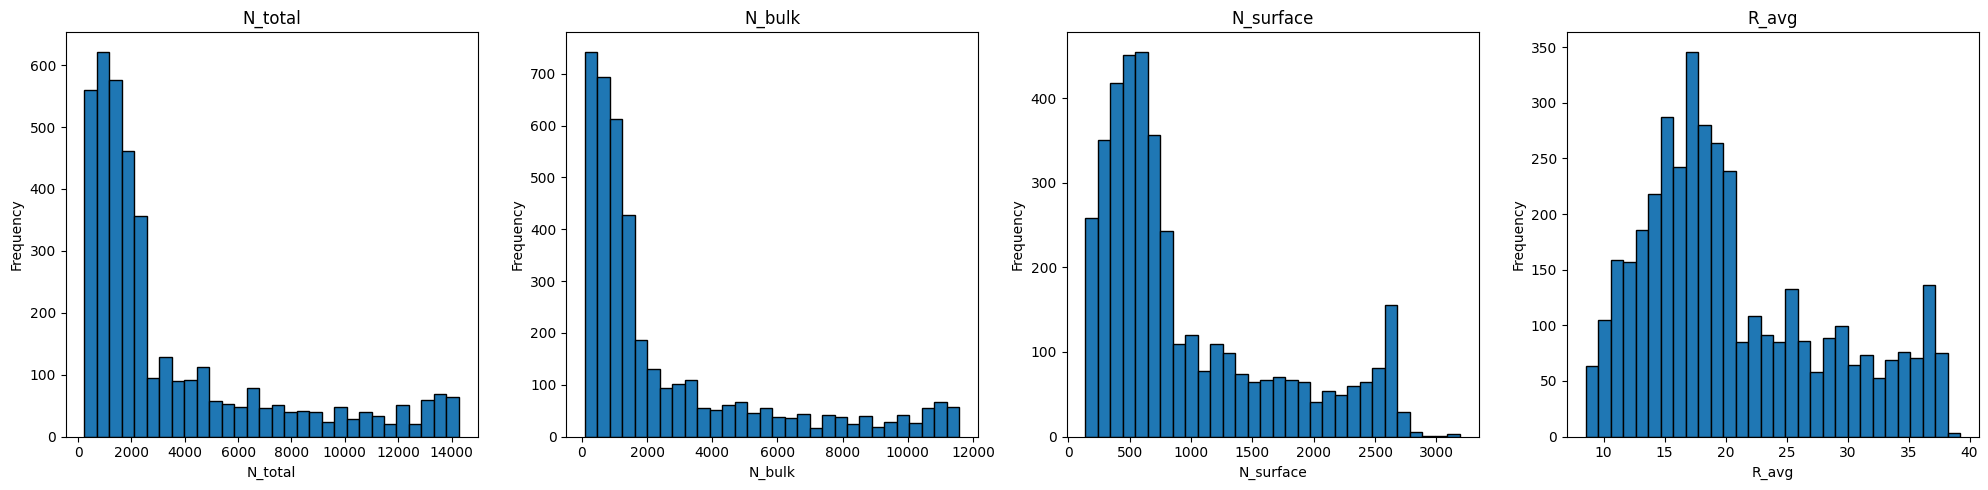

In [15]:
import matplotlib.pyplot as plt

# Plot histograms for each of these features in a 1x4 layout
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes = axes.flatten()

for i, col in enumerate(new_df.columns):
    axes[i].hist(new_df[col], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

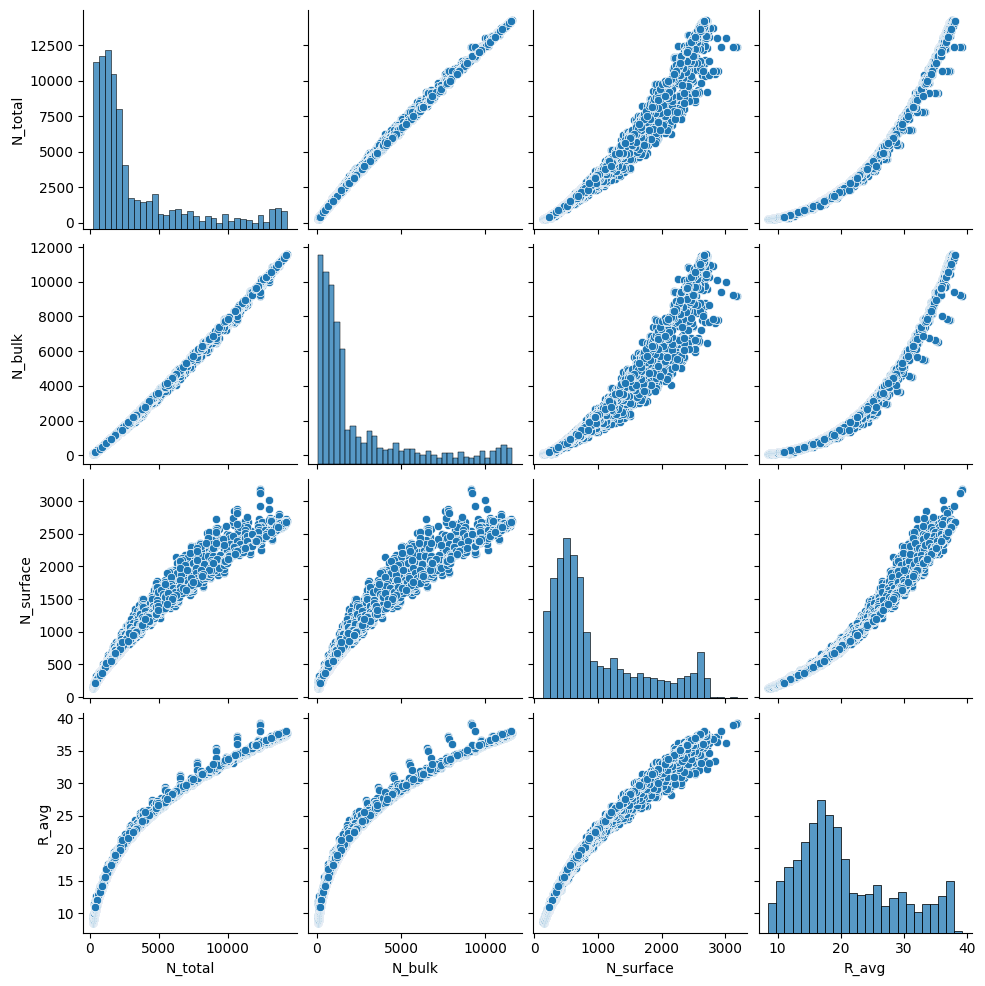

In [16]:
import seaborn as sns

# Visualize the pairwise relationships between these features using seaborn.pairplot
sns.pairplot(new_df)
plt.show()

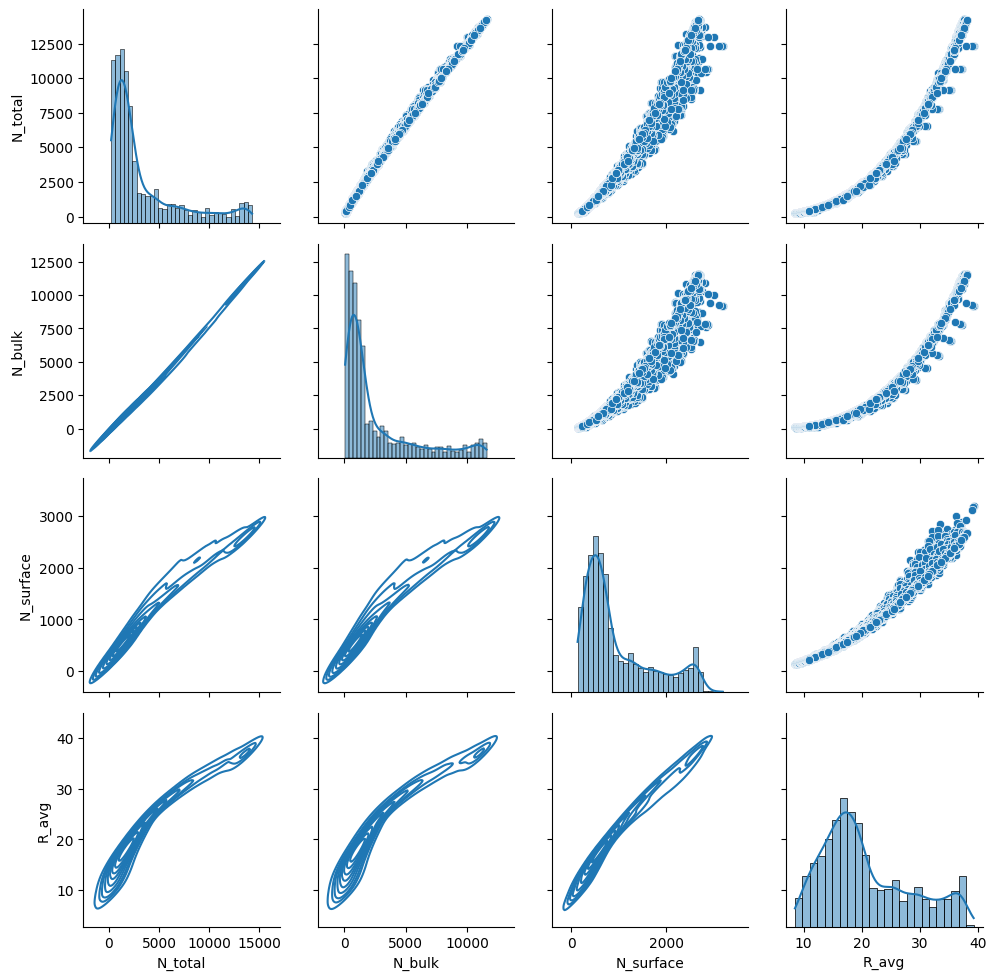

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Customize a seaborn.PairGrid plot
g = sns.PairGrid(new_df)

# Diagonal plots: histograms with KDE
g.map_diag(sns.histplot, kde=True)

# Lower triangle plots: bivariate KDE plots
g.map_lower(sns.kdeplot)

# Upper triangle plots: scatter plots (optional, as pairplot does this by default)
g.map_upper(sns.scatterplot)

plt.show()